## Bengaluru House Price Predictive Model

mainly House rent depends on 5 factors:
1. location
2. sqft area
3. BHK
4. number of bath
5. Neighbourhood/society

In [2]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplot inline

import warnings 
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplot` not found.


## Read the data from the csv file

In [3]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### Check the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


## Making the Dataset into correct format 

In [5]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
# convert the availability to datetime and extract the month 
data['Ready_not'] = pd.to_datetime(data['availability'],format="%d-%b",errors='coerce').dt.strftime('%b')

# if nan is there make it 'ready'
data['Availability'] = [r if pd.notna(r) else "available" for r in data['Ready_not']]

In [7]:
# size feature overview
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
# I would like to remove all the charcters and keep only numbers
# usualy in India 3BHK means 3bedroom, a hall and a kitchen  
# ie, number of BHK = number of bedroom

data['Bedrooms'] = data['size'].str.extract("(\d+)").astype(float)

<AxesSubplot:ylabel='Density'>

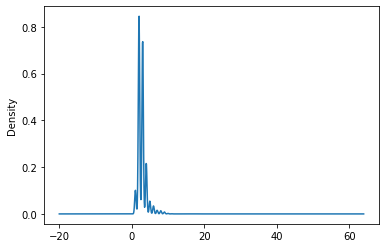

In [9]:
data.Bedrooms.plot.density()

In [10]:
# keep only numbers from total_sqft variable
data['Toal_sqft'] =  data.total_sqft.str.extract("(\d+)").astype(float)

In [11]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()

.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [12]:
# How's Dataset looklike 
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Ready_not,Availability,Bedrooms,Toal_sqft,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN,Dec,Dec,2.0,1056.0,39.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN,NaN,available,4.0,2600.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN,NaN,available,3.0,1440.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN,NaN,available,3.0,1521.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN,NaN,available,2.0,1200.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,NaN,NaN,NaN,NaN,NaN,available,5.0,3453.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,NaN,NaN,NaN,NaN,NaN,available,4.0,3600.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,NaN,NaN,NaN,NaN,NaN,available,2.0,1141.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,NaN,NaN,NaN,NaN,Jun,Jun,4.0,4689.0,488.0


## Data cleaning


In [13]:
# drop the null values 
print("before shape",data.shape)
data.drop(["availability",'size','total_sqft','price','Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9",'Ready_not'],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 18)
after shape (13320, 9)


In [14]:
# total dataset shape is
print("total dataset shape is", data.shape)

# check the null values
data.isna().agg(["mean","sum"]) 


total dataset shape is (13320, 9)


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
mean,0.0,0.000075,0.413063,0.00548,0.045721,0.0,0.001201,0.0,0.0
sum,0.0,1.000000,5502.000000,73.00000,609.000000,0.0,16.000000,0.0,0.0


In [15]:
data.head()

,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
0,Super built-up Area,Electronic City Phase II,Coomee,2.0,1.0,Dec,2.0,1056.0,39.0
1,Plot Area,Chikka Tirupathi,Theanmp,5.0,3.0,available,4.0,2600.0,120.0
2,Built-up Area,Uttarahalli,NaN,2.0,3.0,available,3.0,1440.0,62.0
3,Super built-up Area,Lingadheeranahalli,Soiewre,3.0,1.0,available,3.0,1521.0,95.0
4,Super built-up Area,Kothanur,NaN,2.0,1.0,available,2.0,1200.0,51.0


In [16]:
# data shape before the data
print("before the cleaning the duplicates",data.shape)
print("\n",data[data.duplicated()].count())
print("--"*39)

# removing duplicate values
data_wo_duplicates = data.drop_duplicates(keep="last")
print("data shape after duplicates removal", data_wo_duplicates.shape)


before the cleaning the duplicates (13320, 9)

 area_type       699
location        699
society         479
bath            699
balcony         695
Availability    699
Bedrooms        699
Toal_sqft       699
Price           699
dtype: int64
------------------------------------------------------------------------------
data shape after duplicates removal (12621, 9)


### Seperate the x and y variable


mean      115.56036
median     72.00000
Name: Price, dtype: float64


<AxesSubplot:xlabel='Price', ylabel='Density'>

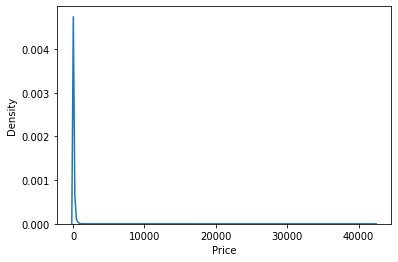

In [17]:
data_x = data.drop('Price',axis=1)
data_y = data['Price']

print(data_y.agg(['mean','median']))

sns.kdeplot(data_y)

In [31]:
# seperate number and categorical data

num = data_x.select_dtypes('number')

cat = data_x.select_dtypes(exclude='number')

### Outliers Treatment

In [32]:
# sns.pairplot(data=data)

,area_type,location,society,Availability
0,Super built-up Area,Electronic City Phase II,Coomee,Dec
1,Plot Area,Chikka Tirupathi,Theanmp,available
2,Built-up Area,Uttarahalli,NaN,available
3,Super built-up Area,Lingadheeranahalli,Soiewre,available
4,Super built-up Area,Kothanur,NaN,available
...,...,...,...,...
13315,Built-up Area,Whitefield,ArsiaEx,available
13316,Super built-up Area,Richards Town,NaN,available
13317,Built-up Area,Raja Rajeshwari Nagar,Mahla T,available
13318,Super built-up Area,Padmanabhanagar,SollyCl,Jun


In [21]:
print("To check the Outliers in the dataset")
data_x.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

To check the Outliers in the dataset


,bath,balcony,Bedrooms,Toal_sqft
count,13247.000000,12711.000000,13304.000000,13320.000000
mean,2.692610,1.584376,2.803743,1552.947072
std,1.341458,0.817263,1.294974,1236.591541
min,1.000000,0.000000,1.000000,1.000000
0.1%,1.000000,0.000000,1.000000,24.000000
1%,1.000000,0.000000,1.000000,460.000000
10%,2.000000,1.000000,2.000000,889.800000
25%,2.000000,1.000000,2.000000,1100.000000
50%,2.000000,2.000000,3.000000,1274.000000
75%,3.000000,2.000000,3.000000,1675.000000


In [29]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.001))
    x=x.clip(upper=x.quantile(0.999))
    return(x)

# capping and flooring of 0.1% ensures the minimal SD impact on the dataset
num=num.apply(lambda x : outlier_cap(x))  

In [30]:
# dataset after outlier Treatment
num.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,bath,balcony,Bedrooms,Toal_sqft
count,13247.000000,12711.000000,13304.000000,13320.000000
mean,2.687703,1.584376,2.797279,1539.254110
std,1.275000,0.817263,1.210042,948.071349
min,1.000000,0.000000,1.000000,24.000000
0.1%,1.000000,0.000000,1.000000,24.000000
1%,1.000000,0.000000,1.000000,460.000000
10%,2.000000,1.000000,2.000000,889.800000
25%,2.000000,1.000000,2.000000,1100.000000
50%,2.000000,2.000000,3.000000,1274.000000
75%,3.000000,2.000000,3.000000,1675.000000


## filling the missing values

In [51]:
data_x.isna().sum()

area_type          0
location           0
society         5502
bath              73
balcony          609
Availability       0
Bedrooms          16
Toal_sqft          0
dtype: int64

In [20]:
# check the number values repeated most of the time
print(data_x.location.value_counts())

# location variable missing one value, which can be filled with mode
data_x['location'] = data_x.location.fillna(data.location.mode)

# check if any nnull value
data_x.location.isna().sum()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64


0


In order to handle the missing values, I'll do first.

Sensitivity Analysis: Assess the sensitivity of your model to missing values in the location variable. 
This can involve running the analysis with and without the location variable or comparing the performance of different imputation methods. 
Sensitivity analysis helps evaluate the impact of missingness on your predictions and identify the best approach.

In [21]:
# create a copy of uncleaned data
df = data_x.copy(deep=True)

In [52]:
# # total number of missing values 
print(data_x.society.isna().sum())

# where and all null values are present in the dataset
data_x.loc[data_x.society.isna()]

5502


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft
2,Built-up Area,Uttarahalli,NaN,2.0,3.0,available,3.0,1440.0
4,Super built-up Area,Kothanur,NaN,2.0,1.0,available,2.0,1200.0
8,Super built-up Area,Marathahalli,NaN,3.0,1.0,available,3.0,1310.0
9,Plot Area,Gandhi Bazar,NaN,6.0,NaN,available,6.0,1020.0
10,Super built-up Area,Whitefield,NaN,2.0,2.0,Feb,3.0,1800.0
...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Rachenahalli,NaN,2.0,2.0,available,2.0,1050.0
13311,Plot Area,Ramamurthy Nagar,NaN,9.0,2.0,available,7.0,1500.0
13312,Super built-up Area,Bellandur,NaN,2.0,2.0,available,2.0,1262.0
13316,Super built-up Area,Richards Town,NaN,5.0,NaN,available,4.0,3600.0


#### Type 1
where I'll drop the all missing values from the society column

In [23]:
# print(df.shape, data.shape)

# # drop all the NaN from society colunm
# df = df.dropna(subset=['society'])

# # check the NaN
# df.isna().sum()

Type II 
fill the society column missing values with "random"
 

In [24]:
# make a copy of data
df_random= data_x.copy(deep=True)

In [25]:
# fill with random address
df_random['society'] = df_random['society'].fillna('random address')

# check the any null value left or not
df_random.society.isna().sum()


0

##### type III 
DO the Random Forest Imputation techinique

There are many imputation techniques we can employ to tackle missing values. For example, imputing means for continuous data is the most routine matter in the case of categorical data. Or we can use machine learning algorithms like KNN and Random Forests to address the missing data problems

We didn’t do any feature transformation, which means KNN, which relies on euclidean distance

In [26]:
# df = data.copy(deep=True)

In [27]:
# missing value imputation in the bath column

print(df_random.bath.isna().sum())

# see the all null values
df_random.loc[df_random.bath.isna()]

73


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
56,Built-up Area,Devanahalli,BrereAt,NaN,NaN,Feb,4.0,3010.0,192.0
81,Built-up Area,Hennur Road,Gollela,NaN,NaN,Oct,4.0,2957.0,224.0
224,Super built-up Area,Devanahalli,Jurdsig,NaN,NaN,Dec,3.0,1520.0,74.0
344,Super built-up Area,Kanakpura Road,PrarePa,NaN,NaN,Dec,1.0,525.0,21.0
579,Plot Area,Sarjapur Road,Asiss B,NaN,NaN,available,NaN,1200.0,34.0
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,Kanakpura Road,PrarePa,NaN,NaN,Dec,1.0,525.0,27.0
11569,Plot Area,Hosur Road,AVeldun,NaN,NaN,available,NaN,1350.0,8.0
12768,Built-up Area,Bettahalsoor,Toainnt,NaN,NaN,Mar,5.0,3210.0,353.0
12861,Super built-up Area,KR Puram,Moquach,NaN,NaN,Dec,4.0,2204.0,121.0


mean      2.69261
median    2.00000
Name: bath, dtype: float64


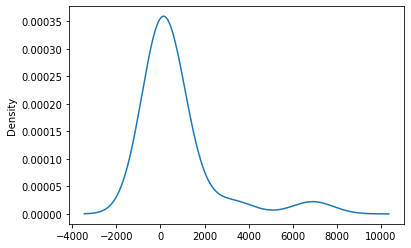

In [28]:
# lets check the distribution
df.bath.value_counts().plot.density();

# check the mean and median 
print(df.bath.agg(['mean','median']))

# fill the null values with median

df_random['bath'] = df_random['bath'].fillna(df_random.bath.median)

0.04572072072072072
mean      1.584376
median    2.000000
Name: balcony, dtype: float64


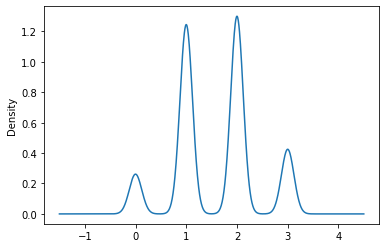

In [29]:
print(df_random.balcony.isna().mean())

# mean and median of the balcony 
print(df_random.balcony.agg(['mean', 'median']))


df_random.balcony.plot.density();


df_random['balcony'] = df_random['balcony'].fillna(df_random.balcony.median)

nan values: 16
mean      2.803743
median    3.000000
Name: Bedrooms, dtype: float64


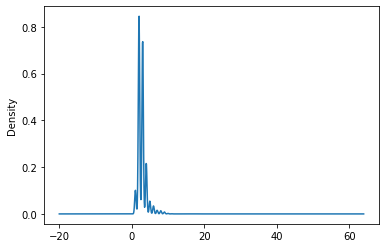

In [32]:
print("nan values:",df_random.Bedrooms.isna().sum())

# mean and median of the balcony 
print(df_random.Bedrooms.agg(['mean', 'median']))


# df_random.Bedrooms.astype(float)
df_random.Bedrooms.plot.density();


df_random['Bedrooms'] = df_random['Bedrooms'].fillna(df_random.Bedrooms.median)


In [34]:
df_random.isna().mean()

area_type       0.0
location        0.0
society         0.0
bath            0.0
balcony         0.0
Availability    0.0
Bedrooms        0.0
Toal_sqft       0.0
Price           0.0
dtype: float64

In [ ]:

# # Convert the strings to datetime objects (ignore errors for non-date values)
# date_objects = pd.to_datetime(dates, format='%y-%b', errors='coerce')

# # Replace 'Immediate Possession' and 'Ready To Move' with a custom string
# dates_cleaned = [date if pd.notnull(date) else 'Possession/Move' for date in date_objects]

# # Extract the month-year combination
# month_year = pd.to_datetime(dates_cleaned, errors='coerce').dt.to_period('M')

# # Create bins based on the month-year combination
# bins = pd.Categorical(month_year, ordered=True)

# # Create a DataFrame with the original dates and the corresponding bins
# df = pd.DataFrame({'Date': dates, 'Month Bin': bins})

# # Display the DataFrame
# print(df)